In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

In [5]:
#read price1, price2, and price3.csv
price1 = pd.read_csv('price1.csv', sep = ';')
price2 = pd.read_csv('price2.csv', sep = ';')
price3 = pd.read_csv('price3.csv', sep = ';')

price2['timestamp'] = price2['timestamp'] + price1['timestamp'].max() + 100
price3['timestamp'] = price3['timestamp'] + price2['timestamp'].max() + 100

In [9]:
combined = pd.concat([price1, price2, price3])

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
109985,3,2999800,DIVING_GEAR,100296.0,7.0,100295.0,13.0,NaN,NaN,100298.0,5.0,100299.0,13.0,NaN,NaN,100297.0,-232784.0
109986,3,2999800,PINA_COLADAS,14919.0,83.0,NaN,NaN,NaN,NaN,14922.0,83.0,NaN,NaN,NaN,NaN,14920.5,-127980.0
109987,3,2999800,DIP,7081.0,278.0,NaN,NaN,NaN,NaN,7083.0,278.0,NaN,NaN,NaN,NaN,7082.0,114760.0
109988,3,2999800,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3170.0,0.0
109989,3,2999900,PICNIC_BASKET,73840.0,2.0,73839.0,18.0,73838.0,23.0,73851.0,2.0,73852.0,18.0,73854.0,23.0,73845.5,370936.0
109990,3,2999900,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3170.0,0.0
109991,3,2999900,PINA_COLADAS,14916.0,98.0,NaN,NaN,NaN,NaN,14919.0,98.0,NaN,NaN,NaN,NaN,14917.5,-120488.0
109992,3,2999900,COCONUTS,7946.0,200.0,NaN,NaN,NaN,NaN,7948.0,69.0,7949.0,131.0,NaN,NaN,7947.0,-177368.0
109993,3,2999900,DIP,7082.0,271.0,NaN,NaN,NaN,NaN,7084.0,261.0,NaN,NaN,NaN,NaN,7083.0,108116.0
109994,3,2999900,UKULELE,20430.0,23.0,20429.0,42.0,NaN,NaN,20431.0,65.0,NaN,NaN,NaN,NaN,20430.5,846736.0


In [11]:
trades1 = pd.read_csv('trades1.csv', sep = ';')
trades2 = pd.read_csv('trades2.csv', sep = ';')
trades3 = pd.read_csv('trades3.csv', sep = ';')

trades2['timestamp'] = trades2['timestamp'] + price1['timestamp'].max() + 100
trades3['timestamp'] = trades3['timestamp'] + price2['timestamp'].max() + 100

In [12]:
combinedTrades = pd.concat([trades1, trades2, trades3])

In [20]:
productCharts = {item:combined[combined['product'] == item] for item in combined['product'].unique() if item != 'DOLPHIN_SIGHTINGS'}

In [21]:
buyOrders = {buyer:combinedTrades[combinedTrades['buyer'] == buyer] for buyer in combinedTrades['buyer'].unique()}
sellOrders = {seller:combinedTrades[combinedTrades['seller'] == seller] for seller in combinedTrades['seller'].unique()}

In [24]:
traders = ['Paris', 'Charlie', 'Caesar', 'Penelope', 'Camilla', 'Pablo', 'Gina', 'Gary', 'Peter', 'Olivia']

       timestamp  buyer   seller    symbol   currency    price  quantity
0            100  Paris  Charlie    PEARLS  SEASHELLS  10002.0         1
1            100  Paris  Charlie   BANANAS  SEASHELLS   4875.0         1
2            200  Paris  Camilla       DIP  SEASHELLS   7002.0         9
3            200  Paris  Charlie   BANANAS  SEASHELLS   4876.0         1
4            200  Paris   Caesar    PEARLS  SEASHELLS  10004.0         1
...          ...    ...      ...       ...        ...      ...       ...
10740    2998300  Paris   Caesar   UKULELE  SEASHELLS  20431.0         1
10746    2999100  Paris  Camilla   BERRIES  SEASHELLS   3835.0         7
10753    2999600  Paris  Camilla    PEARLS  SEASHELLS  10002.0         2
10755    2999600  Paris    Paris   BANANAS  SEASHELLS   4749.0         1
10757    2999600  Paris   Caesar  BAGUETTE  SEASHELLS  12325.0         4

[9923 rows x 7 columns]


In [22]:
products = ['PINA_COLADAS', 'DIP', 'BAGUETTE', 'PICNIC_BASKET', 'BERRIES', 'DIVING_GEAR', 'BANANAS', 'COCONUTS', 'PEARLS', 'UKULELE']

['Paris', 'Charlie', 'Caesar', 'Penelope', 'Camilla', 'Pablo', 'Gina', 'Gary']


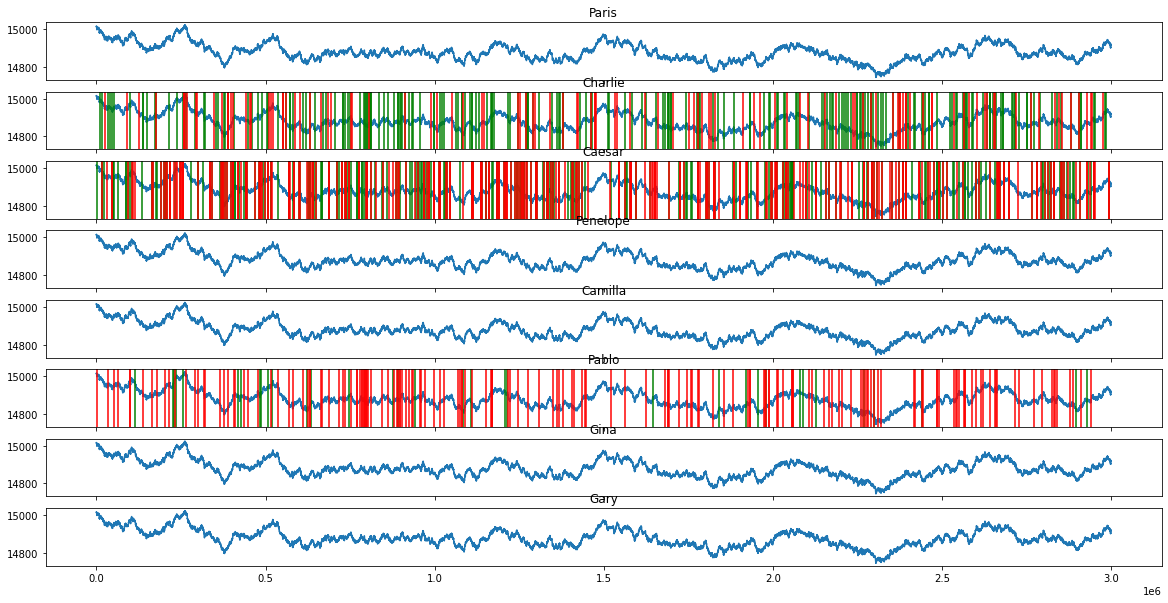

In [33]:
#PEARLS
#plot the mid_price of pearls n times if n is the number of traders
#for each chart, place a green line when a buyer makes a trade and a red line when a seller makes a trade. Loop through each trader
pearlTraders = [trader for trader in traders if 'PEARLS' in buyOrders[trader]['symbol'].unique() or 'PEARLS' in sellOrders[trader]['symbol'].unique()]
print(pearlTraders)
fig, axs = plt.subplots(len(pearlTraders), 1, sharex=True)
for i in range(len(pearlTraders)):
    axs[i].plot(productCharts['PEARLS']['timestamp'], productCharts['PINA_COLADAS']['mid_price'])
    axs[i].set_title(pearlTraders[i])
    buyTrades = buyOrders[pearlTraders[i]]
    buyTrades = buyTrades[buyTrades['symbol'] == 'PINA_COLADAS']
    for j in range(len(buyTrades)):
        axs[i].axvline(x=buyTrades['timestamp'].iloc[j], color='green')
    sellTrades = sellOrders[pearlTraders[i]]
    sellTrades = sellTrades[sellTrades['symbol'] == 'PINA_COLADAS']
    for j in range(len(sellTrades)):
        axs[i].axvline(x=sellTrades['timestamp'].iloc[j], color='red')
    


In [31]:
#BERRIES
berryTraders = [trader for trader in traders if 'BERRIES' in buyOrders[trader]['symbol'].unique() or 'BERRIES' in sellOrders[trader]['symbol'].unique()]
berryTraders

['Paris',
 'Charlie',
 'Penelope',
 'Camilla',
 'Pablo',
 'Gina',
 'Gary',
 'Peter',
 'Olivia']